In [1]:
import pandas as pd
import numpy as np
import plotly.express as px


Information Gain: 

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

Entropy

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$



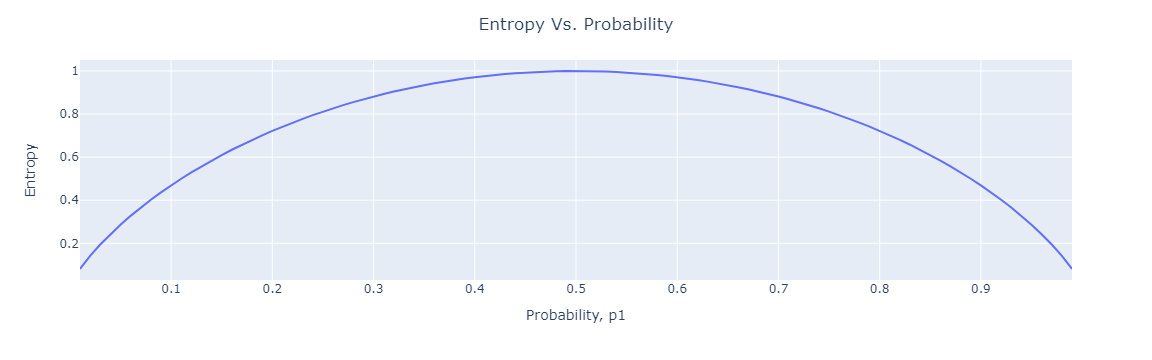

In [18]:
x = np.arange(0.01,1,0.01)

y = -x * np.emath.logn(2, x) - (1-x) * np.emath.logn(2, 1-x )

fig = px.line(x=x,y=y,
        labels={
             "y": "Entropy",
             "x": "Probability, p1",
                })
fig.update_layout(
    title = {
        'text':'Entropy Vs. Probability',
        'x':0.5,
        'xanchor':'center'})

In [49]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [55]:
df= pd.DataFrame(X_train, columns = ['ear shape', 'face shape', 'whiskers'])
df['cat'] = y_train
df

,ear shape,face shape,whiskers,cat
0,1,1,1,1
1,0,0,1,1
2,0,1,0,0
3,1,0,1,0
4,1,1,1,1
5,1,1,0,1
6,0,0,0,0
7,1,1,0,1
8,0,1,0,0
9,0,1,0,0


In [56]:
def entropy(p):
    if p == 0 or p ==1:
        return 0
    else:
        return -p * np.emath.logn(2, p) - (1-p) * np.emath.logn(2, 1-p )

In [152]:
def split_df(df, col):
    """
    Given a dataframe and a binary column,
    splits the dataframe in two
    
    Outputs:
    left split: false feature & cat
    right split: true feature & cat
    """
    indexes = (df[col] == False)
    
    left_split = df[indexes].drop(col, axis =1 )
    right_split = df[~indexes].drop(col, axis =1 )
    
    return left_split, right_split

In [153]:
def weighted_entropy(left, right):
    """
    Calculates the weighted entropy of the left & right df
    
    Weighted entropy = ratio of data in df * entropy(p) 
    
    """
    size = len(left) + len(right)
    
    w_left = len(left)/size
    w_right = len(right)/size
    
    p_left = left['cat'].sum() / len(left)
    p_right = right['cat'].sum()/ len(right)
    
    return w_left * entropy(p_left) + w_right * entropy(p_right) 

In [154]:
weighted_entropy(*split_df(df, 'ear shape'))

0.7219280948873623

In [155]:
def info_gain(df, left, right):
    p_node = df['cat'].sum()/ len(df)
    H_node = entropy(p_node)
    
    w_entropy = weighted_entropy(left,right) 
    return H_node - w_entropy
    

In [156]:
info_gain(df, *split_df(df,'ear shape'))

0.2780719051126377

In [158]:
def max_info(df):
    # calculate df size, node information, probability & entropy 
    size = len(df)
    
    p_node =  df.iloc[:,-1].sum()/ size
    H_node = entropy(p_node) 
    
    # initialise dictionary to store information gain of each respective column 
    w_entropy = {} 
    
    # loop through all columns (except target column)
    for i, col in enumerate(df.columns[:-1]):
        
        # based on selected column, split dataframe into Left & Right (Trues and Falses)
        indexes = (df[col] == True)
        left = df[indexes].iloc[:,[i,-1]]
        right = df[~indexes].iloc[:,[i,-1]]
        
        # calculate weighted entropy, node entropy - ( weight_left * entropy(p_left) + weight_right * entropy(p_right) )
        w_entropy[col] = H_node - ((len(left)/size) * entropy( left.iloc[:,1].sum()/ len(left) ) + (len(right)/size) * entropy( right.iloc[:,1].sum()/ len(right) ))
        
    return w_entropy
        

In [210]:
a = max_info(df)

In [218]:
max(a, key = a.get)

'ear shape'

In [212]:
max(a.values())

0.2780719051126377

In [214]:
max_info(df)

{'ear shape': 0.2780719051126377,
 'face shape': 0.034851554559677034,
 'whiskers': 0.12451124978365313}

In [239]:
print(f'-3' +f'hello')


-3hello


In [265]:
def random_forest(df, max_depth = 2, current_depth = 0 , min_entropy_gain = 0.20, node = 'root'):
    # HYPERPARAMS 1 
    if current_depth <= max_depth: 
        print(df)
        print('-'*current_depth + f'Depth: {current_depth}, {node}')
        
            
        # calculate entropy gains of all columns
        entropy = max_info(df)

        # obtain key and value of max entropy
        max_entropy_key = max(entropy, key = entropy.get)
        max_entropy_gain = max(entropy.values())
        print(f'max entropy: {entropy}')
        print(f'Splitting using: {max_entropy_key}')
        print()

        # HYPERPARAMS 2 
        if max_entropy_gain > min_entropy_gain:
            left, right = split_df(df, max_entropy_key)
            
            # check if you still have enough columns (2 feature + 1 target)
            if len(df.columns) - 1 >= 3:
                print(left)
                random_forest(left, current_depth = current_depth + 1, node = 'left')
                print(right)
                random_forest(right, current_depth = current_depth + 1, node= 'right')
            else:
                print(f'not enough columns for Depth: {current_depth +1}')
                # print()

        else:
            print('insufficient gain')
        
        

In [266]:
random_forest(df)

   ear shape  face shape  whiskers  cat
0          1           1         1    1
1          0           0         1    1
2          0           1         0    0
3          1           0         1    0
4          1           1         1    1
5          1           1         0    1
6          0           0         0    0
7          1           1         0    1
8          0           1         0    0
9          0           1         0    0
Depth: 0, root
max entropy: {'ear shape': 0.2780719051126377, 'face shape': 0.034851554559677034, 'whiskers': 0.12451124978365313}
Splitting using: ear shape

   face shape  whiskers  cat
1           0         1    1
2           1         0    0
6           0         0    0
8           1         0    0
9           1         0    0
   face shape  whiskers  cat
1           0         1    1
2           1         0    0
6           0         0    0
8           1         0    0
9           1         0    0
-Depth: 1, left
max entropy: {'face shape': 0.3219280

1. calculate max info
2. is max info > threshold?
3. yes, split and calculate max info (x2 df)
4. repeat 1 2 3 for both